# SESSION: Simulating time series signals and noise #3.35 and 3.36. Project 1-2: Dipole-level EEG data

COURSE: Neural signal processing and analysis: Zero to hero

TEACHER: Mike X Cohen, sincxpress.com

## Goal:

The goal of this assignment is to data using dipoles

First, import relevant libraries and load emptyEEG

In [235]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
from scipy.interpolate import interp1d
from utils import *

In [236]:
rng = np.random.default_rng()
EEG,lf = read_emptyEEG()

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


Text(0.5, 0.92, 'Brain Dipole Locations')

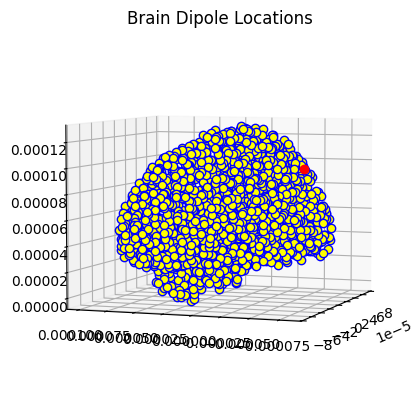

In [237]:
# select dipole location (more-or-less random)
# remember to -1 if you want the same one as Cohen
diploc = 109-1

#plot brain dipoles
ax = plt.figure().add_subplot(projection='3d')
ax.plot(lf["GridLoc"][:,0],lf["GridLoc"][:,1],lf["GridLoc"][:,2], marker="o", lw = 0, markeredgecolor="blue",markerfacecolor="yellow")
ax.plot(lf["GridLoc"][diploc,0],lf["GridLoc"][diploc,1],lf["GridLoc"][diploc,2],"ro")
ax.view_init(azim=200, elev=5)
ax.set_title("Brain Dipole Locations")

Each dipole can be projected onto the scalp using the "forward model". We get this information from Cohen's `lf["Gain"]`.
The code below is the projection from our 1 dipole.

(<matplotlib.image.AxesImage at 0x216f0c108b0>,
 <matplotlib.contour.QuadContourSet at 0x216f0c139d0>)

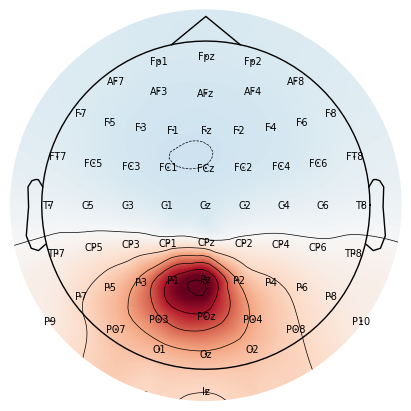

In [238]:
mne.viz.plot_topomap(-lf["Gain"][:,1,diploc], EEG.info, size = 4, names=EEG.ch_names,show = False)

Add signal to one dipole and project to scalp.

In [239]:
EEG

<EpochsArray | 1 events (all good), 0 – 10 s (baseline off), ~5.1 MB, data loaded,
 '1': 1>

In [240]:
#reduce data size a bit
new_pnts = 2000
new_times = EEG.times[0:new_pnts+1]
EEG = mne.EpochsArray(info=EEG.info,data=EEG.get_data(tmin=min(new_times),tmax=max(new_times)))

#initialize all dipole data
dipole_data = np.zeros((len(EEG.events),lf["Gain"].shape[2],len(EEG.times)))

#add signal to one dipole
dipole_data[:,diploc,:] = np.sin(np.multiply(2*np.pi,np.multiply(10,EEG.times)))

#now project dipole data to scalp electrodes
EEG = mne.EpochsArray(info=EEG.info,data=np.matmul(lf["Gain"][:,1,:],dipole_data))

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


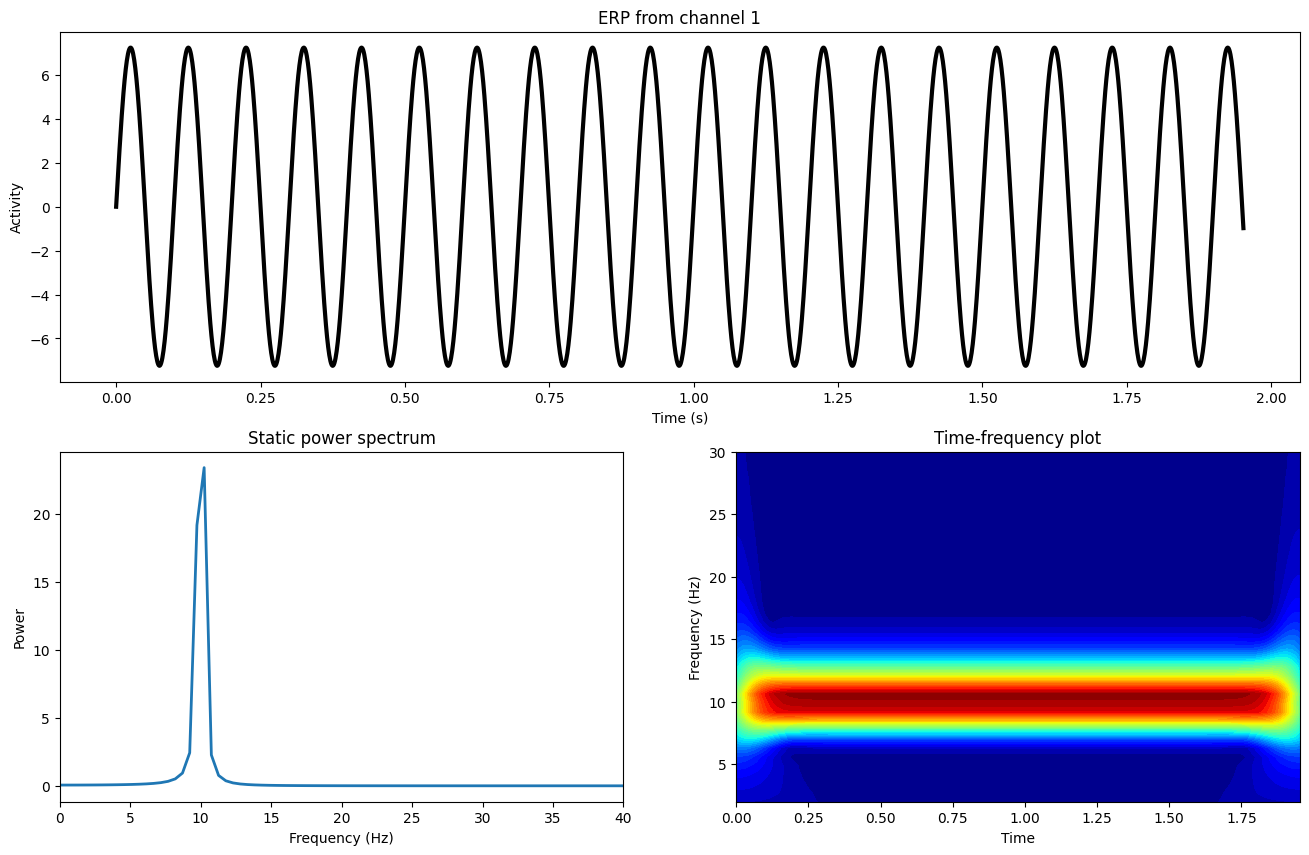

In [241]:
#plot the data
pick="Pz"
plot_simEEG_mne(EEG,1)

Now, for the projects!
**IMPORTANT** Check internal consistency with existing EEG structures as you work. 

## 1) pure sine wave with amplitude explorations

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


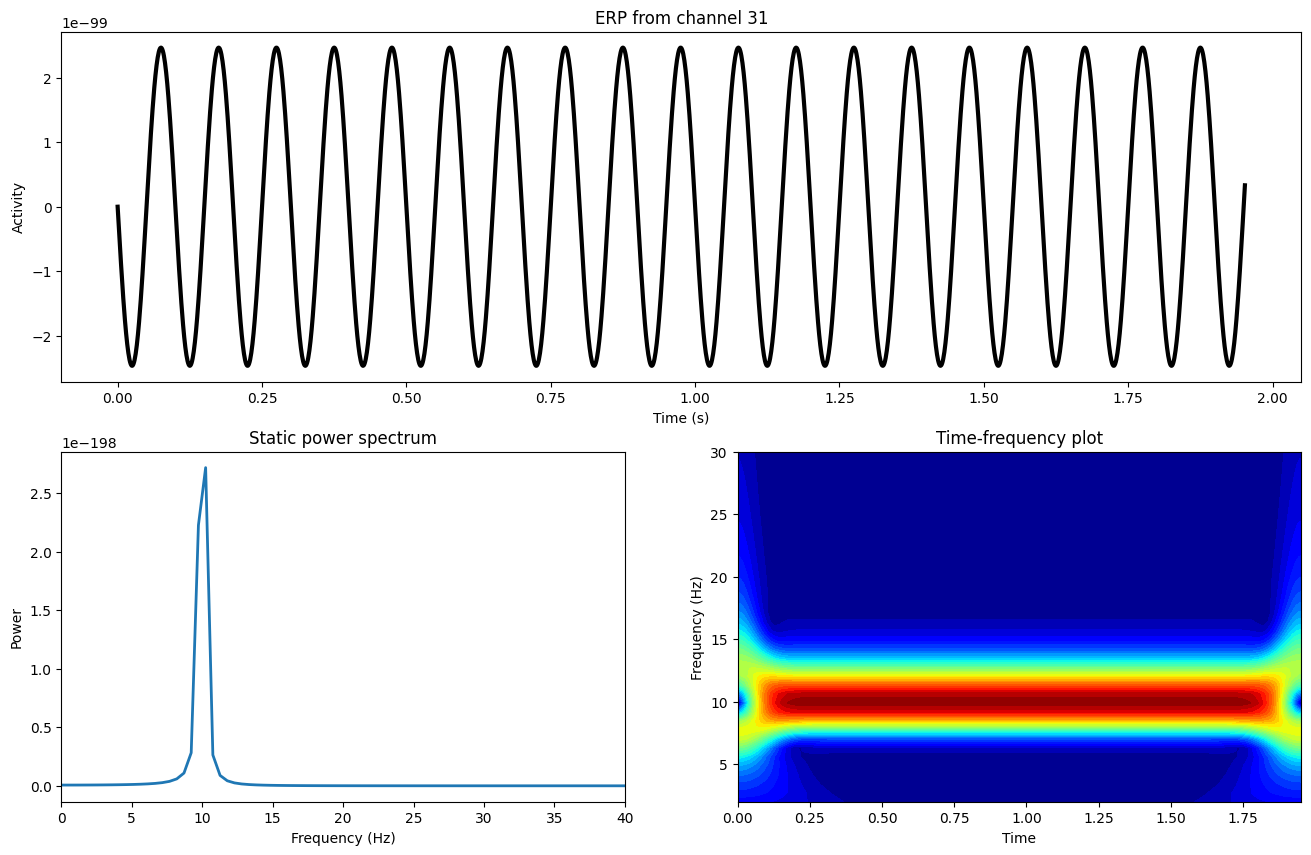

In [242]:
#repeat that for N trials
new_trials = 40
#dipole amplitude magnitude
ampl = 10e-100

#initialize all dipole data
dipole_data = np.zeros((new_trials,lf["Gain"].shape[2],len(EEG.times)))

#compute all_trials
for i in range(new_trials):
  dipole_data[i,diploc,:] = ampl*np.sin(np.multiply(2*np.pi,np.multiply(10,EEG.times)))

#project dipole data to scalp electrodes
EEG = mne.EpochsArray(info=EEG.info,data=np.matmul(lf["Gain"][:,1,:],dipole_data))
plot_simEEG_mne(EEG,31,2)

### Question
What is the smallest amplitude of dipole signal that still elicits a scalp-level response?

## 2) sine wave with noise

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


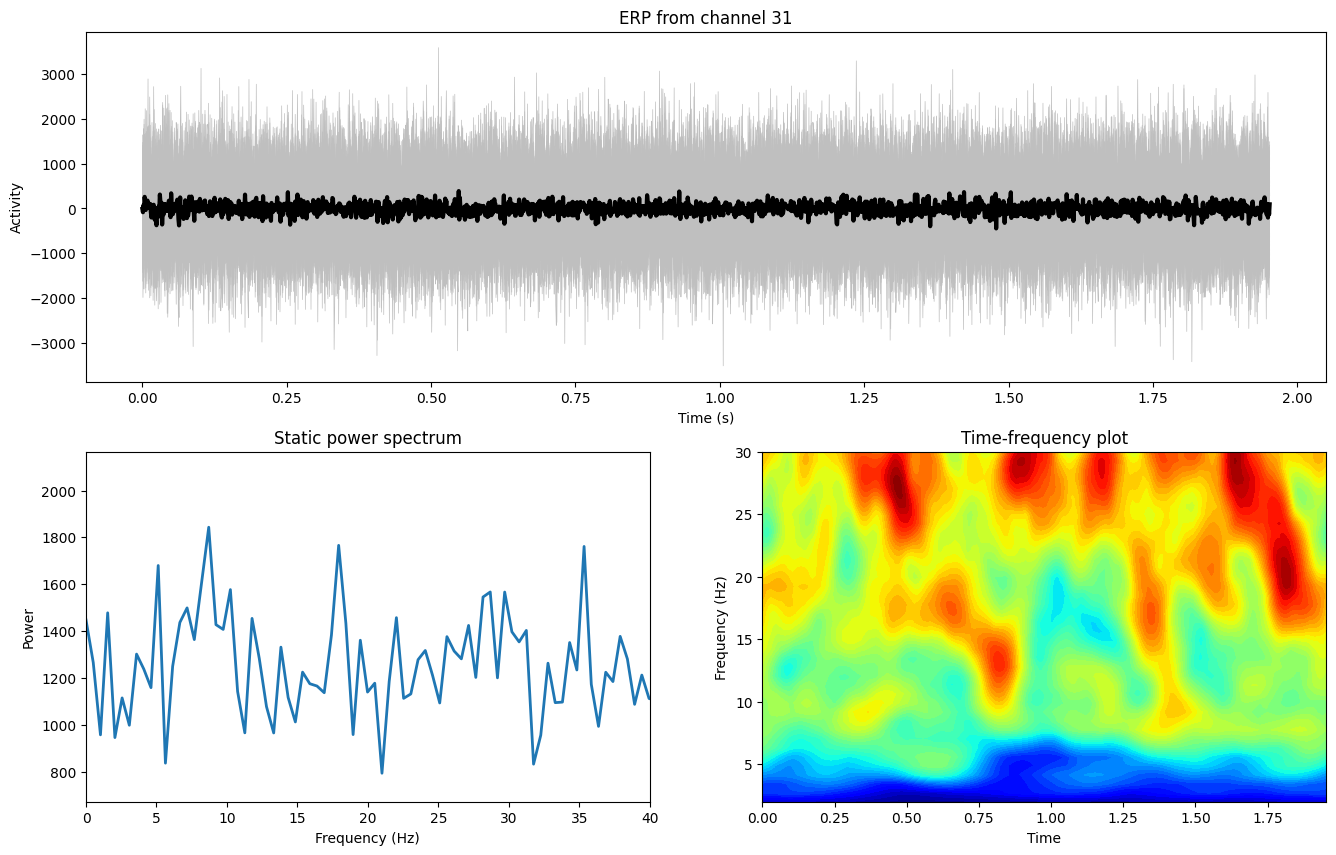

In [260]:
new_trials = 40
#dipole amplitude magnitude
ampl = 1
noise_sd = 1

#initialize all dipole data
dipole_data = np.zeros((new_trials,lf["Gain"].shape[2],len(EEG.times)))

#compute all_trials
# something is behaving differently here and the noise is stronger in python than matlab..
for i in range(new_trials):
  dipole_data[i,:,:] = noise_sd*rng.normal(size=(lf["Gain"].shape[2],len(EEG.times)))
  dipole_data[i,diploc,:] = (ampl)*np.sin(np.multiply(2*np.pi,np.multiply(10,EEG.times)))

#project dipole data to scalp electrodes
EEG = mne.EpochsArray(info=EEG.info,data=np.matmul(lf["Gain"][:,1,:],dipole_data))
plot_simEEG_mne(EEG,31,2)

### Question
Given amplitude=1 of dipole signal, what standard deviation of noise at all other dipoles overpowers the signal (qualitatively)?

## 3) Non-oscillatory transient in one dipole, noise in all other dipoles

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


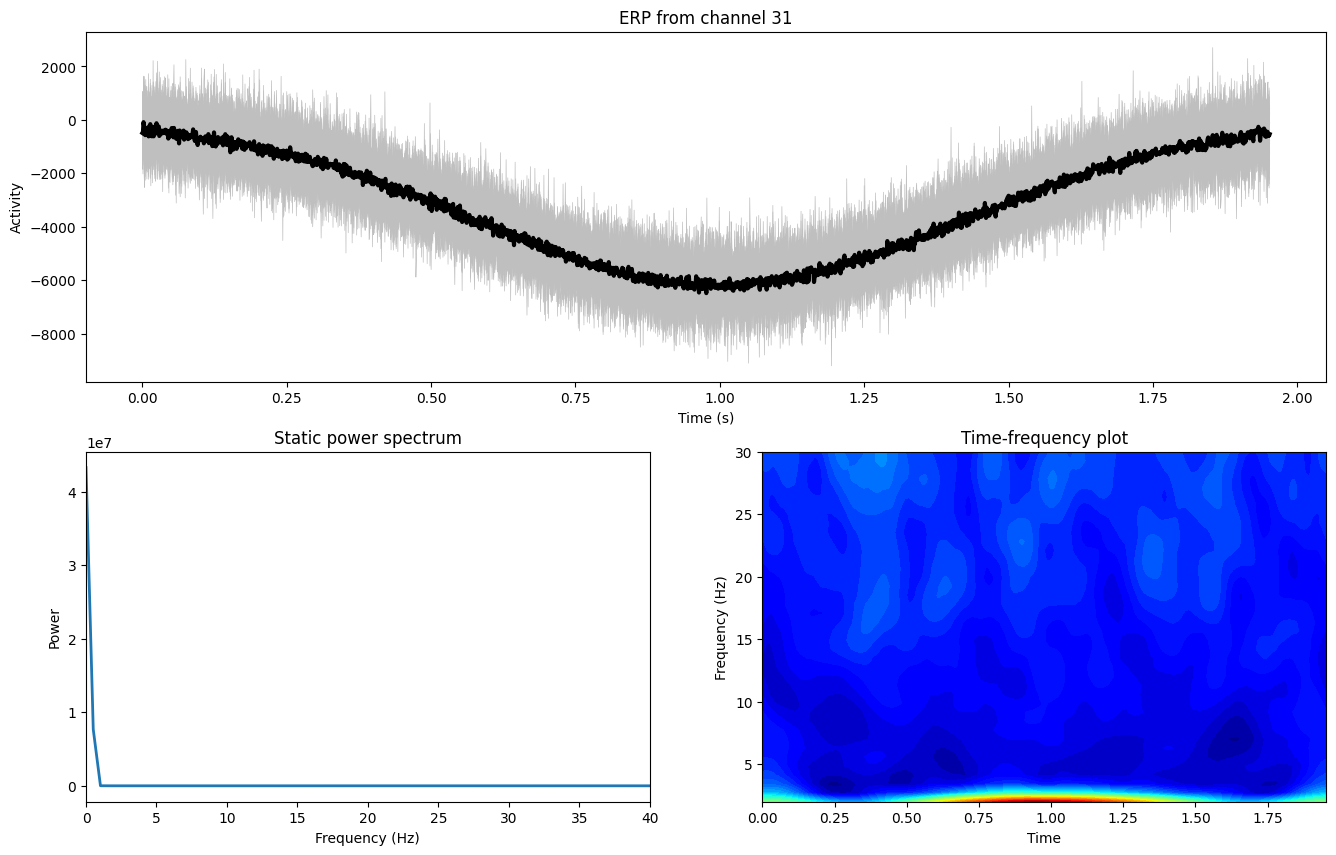

In [290]:
# I think that means make a gaus in one dipole
new_trials = 40
#dipole amplitude magnitude
ampl = 5
noise_sd = 1
# gaussian parameters (in seconds)
peaktime = 1
fwhm = .1

# generate time-domain gaussian
trialpeak = peaktime #+np.random.randn()/10 # uncomment the +np.random for the jitter question
gaus = ampl*np.exp(-4*(np.multiply(np.log(2),np.power(EEG.times-trialpeak,2)))) / (np.power(fwhm,2))

#initialize all dipole data
dipole_data = np.zeros((new_trials,lf["Gain"].shape[2],len(EEG.times)))

#compute all_trials
for i in range(new_trials):
  dipole_data[i,:,:] = noise_sd*rng.normal(size=(lf["Gain"].shape[2],len(EEG.times)))

  dipole_data[i,diploc,:] = (ampl)*gaus

#project dipole data to scalp electrodes
EEG = mne.EpochsArray(info=EEG.info,data=np.matmul(lf["Gain"][:,1,:],dipole_data))
plot_simEEG_mne(EEG,31,2)

## 4) non-stationary oscillation in one dipole, transient oscillation in another dipole, noise in all dipoles

(<matplotlib.image.AxesImage at 0x216f63c9e10>,
 <matplotlib.contour.QuadContourSet at 0x216f63ca260>)

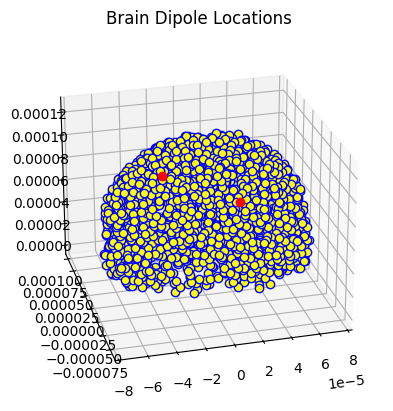

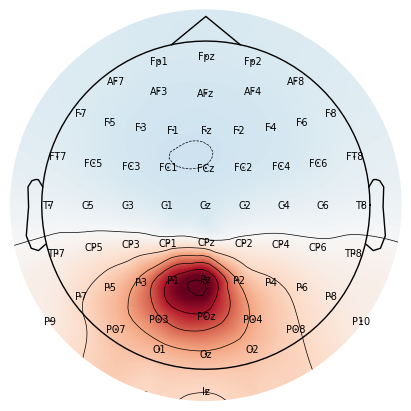

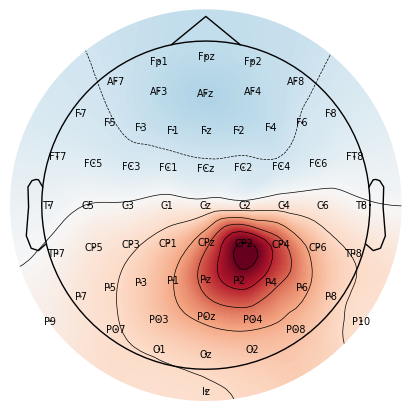

In [329]:
# first pick two dipoles
# select dipole location (more-or-less random)
# remember to -1 if you want the same one as Cohen
diploc1 = 109-1
diploc2 = 510-1

#plot the brain dipoles
#plot brain dipoles
ax = plt.figure().add_subplot(projection='3d')
ax.plot(lf["GridLoc"][:,0],lf["GridLoc"][:,1],lf["GridLoc"][:,2], marker="o", lw = 0, markeredgecolor="blue",markerfacecolor="yellow")
ax.plot(lf["GridLoc"][diploc1,0],lf["GridLoc"][diploc1,1],lf["GridLoc"][diploc1,2],"ro")
ax.plot(lf["GridLoc"][diploc2,0],lf["GridLoc"][diploc2,1],lf["GridLoc"][diploc2,2],"ro")
ax.view_init(azim=-105, elev=25)
ax.set_title("Brain Dipole Locations")
mne.viz.plot_topomap(-lf["Gain"][:,1,diploc1], EEG.info, size = 4, names=EEG.ch_names,show = False)
mne.viz.plot_topomap(-lf["Gain"][:,1,diploc2], EEG.info, size = 4, names=EEG.ch_names,show = False)

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


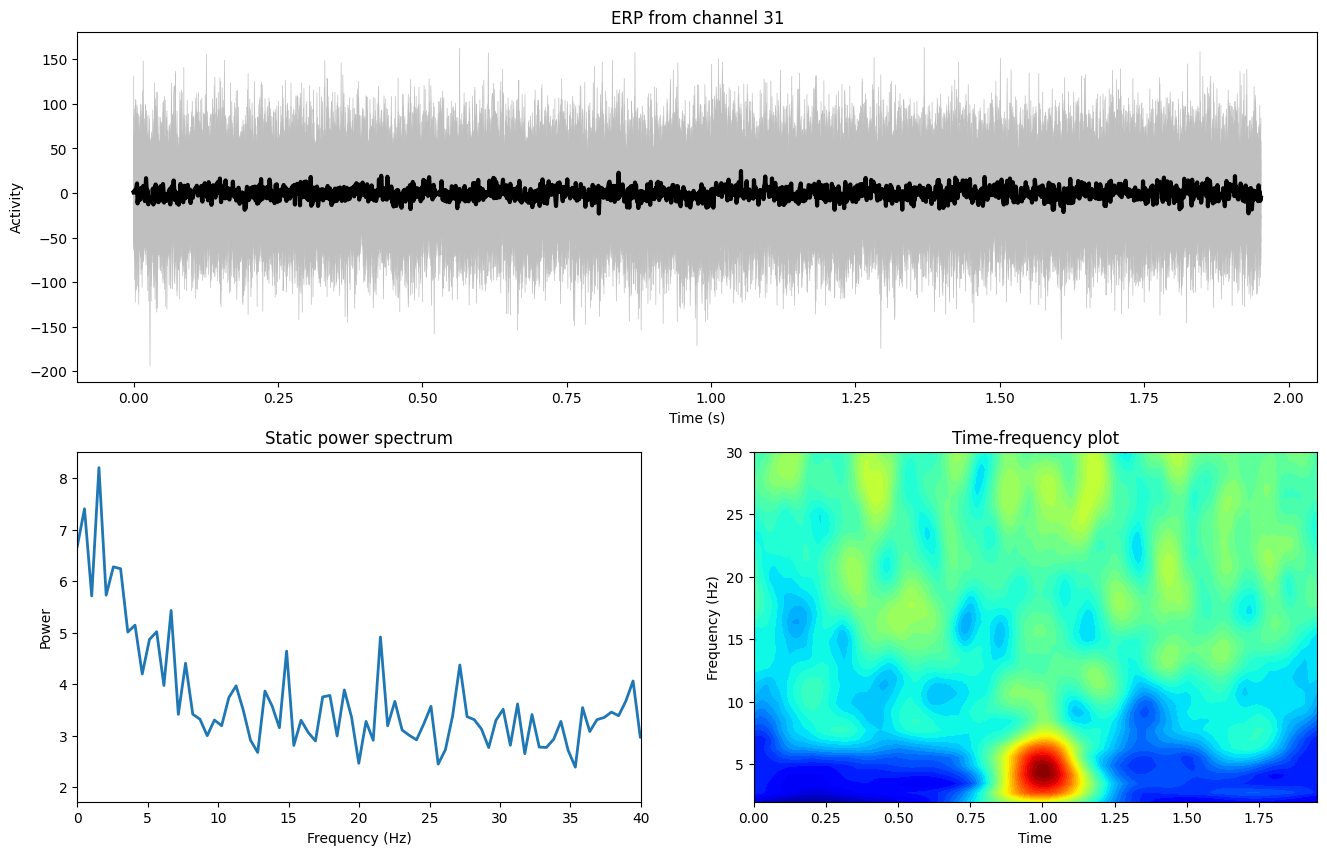

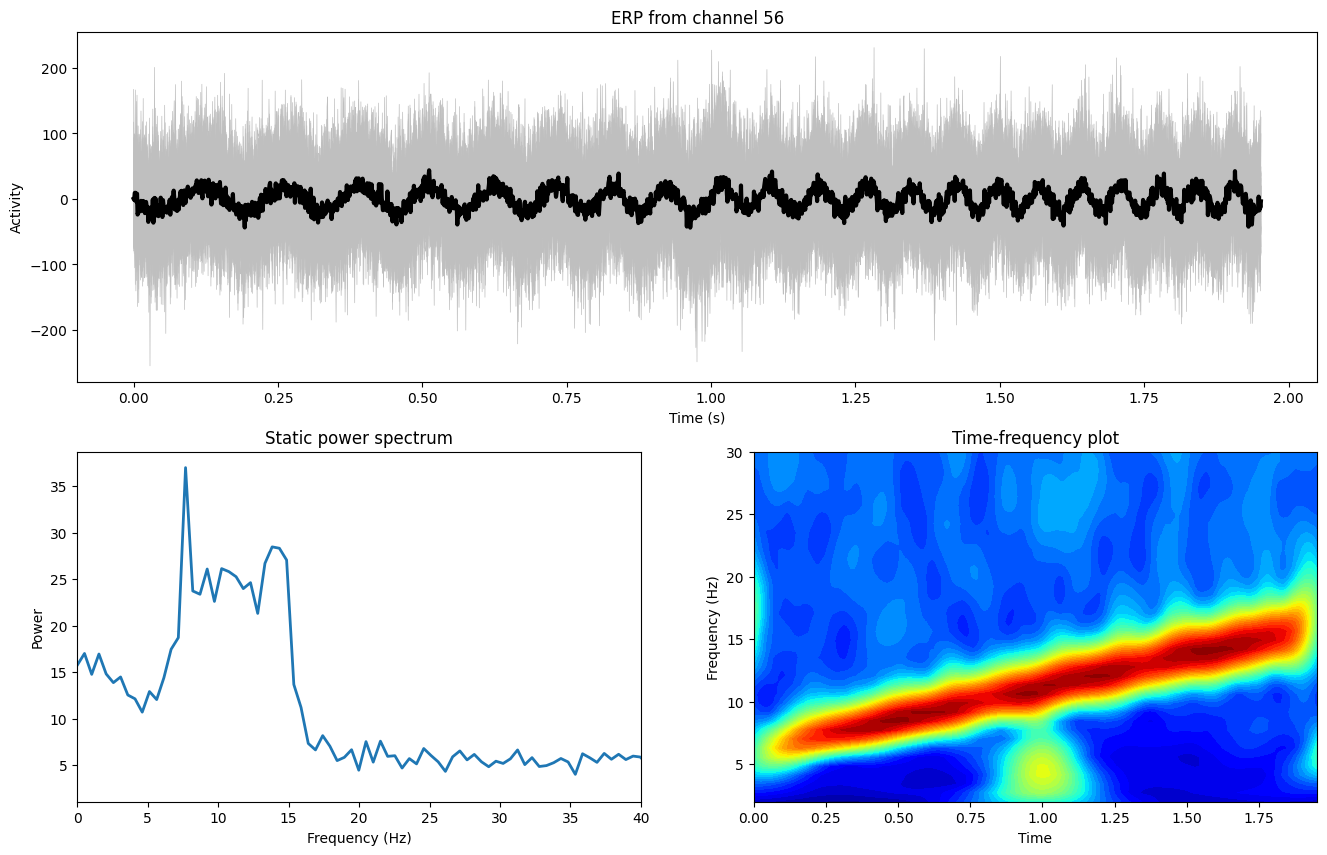

In [342]:
# then do the simulation
new_trials = 40
noise_sd = .05

#params for transient oscillation
peaktime = 1
fwhm2 = .4
sinefreq = 2 # in Hz 
ampt = 1

#params for nonstationary oscillation
ampn = 1

pnts=len(EEG.times)

#initialize all dipole data
dipole_data = np.zeros((new_trials,lf["Gain"].shape[2],len(EEG.times)))

#compute all_trials
for i in range(new_trials):
  dipole_data[i,:,:] = noise_sd*rng.normal(size=(lf["Gain"].shape[2],len(EEG.times)))
  
  # generate non-stationary oscillation
  # Cohen used a chirp
  freqmod = np.linspace(5,15,num=pnts) #freqmod is the 'f' variable from the lecture
  nonstatosc = ampn*np.sin(np.multiply(2*np.pi,(EEG.times + np.cumsum(freqmod)/EEG.info["sfreq"])))
  
  # generate transient oscillation
  # create gaussian taper
  gaus = np.exp(-(4*(np.multiply(np.log(2),np.power(EEG.times-peaktime,2)))) / (np.power(fwhm,2)))
  # sine wave iwth random phase value (non-phase locked)
  cosw = np.cos(np.multiply(2*np.pi,np.multiply(sinefreq,EEG.times))+(2*np.pi*rng.random()))
  # go back to time domain to get EEG data
  transosc = ampt*np.multiply(cosw,gaus)
  
  
  dipole_data[i,diploc1,:] = nonstatosc
  dipole_data[i,diploc2,:] = transosc

#project dipole data to scalp electrodes
EEG = mne.EpochsArray(info=EEG.info,data=np.matmul(lf["Gain"][:,1,:],dipole_data))
plot_simEEG_mne(EEG,31)
plot_simEEG_mne(EEG,56)